In [36]:
import pandas as pd
import numpy as np

# Importing libraries for plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
malldata = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [38]:
malldata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Lets check if our malldata has NaN values:

In [39]:
malldata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Okay, so we have a clean dataset.

The CustomerID feels useless so lets drop it:

In [40]:
malldata.drop(['CustomerID'], inplace=True, axis=1)

# Visualizing the Data:


In [46]:
malldata.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [47]:
import plotly.express as px

df = px.data.tips()

fig = px.histogram(malldata, x='Spending Score (1-100)', y = 'Annual Income (k$)',
                  color = 'Gender', hover_data = malldata.columns, marginal = 'box')

fig.show()


Lets look at how the three main elements in this data, Age, Spending Score and Annual Income interact:

In [134]:
# Literally the first time I am using plotly and it is amazing:
import plotly.graph_objects as go
plt.figure(figsize=(10,10))
fig = go.Figure(data= [go.Mesh3d(x = malldata['Spending Score (1-100)'],
                                 y = malldata['Annual Income (k$)'],
                                 z = malldata['Age'],
                                 opacity = 0.5, color = 'skyblue')])

fig.update_layout(scene = dict(xaxis_title='Spending Score',
                               yaxis_title='Annual Income',
                               zaxis_title='Age'),
                  )

fig.show()

<Figure size 720x720 with 0 Axes>

Here's an interactive histogram expressing how the spending scores in males and females change with their age.

In [56]:
d = px.data.gapminder()
    
f = px.bar(malldata, x = malldata["Gender"], y = malldata["Spending Score (1-100)"],
           color = malldata["Gender"], animation_frame = malldata["Age"],
           range_y = [0,100])

fig.update_layout(scene = dict(xaxis_title='Gender',
                               yaxis_title='Spending Score (1-100)',
                               zaxis_title='Age'))
f.show()

Lets now switch to seaborn to plot a scatterplot trying to visualize the correlation between age and spending score:

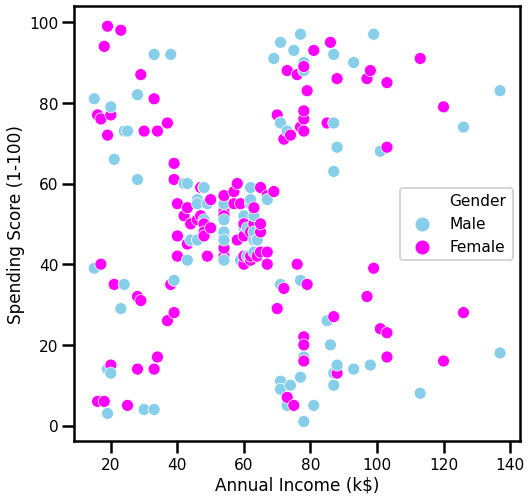

In [72]:
sns.set_context("poster", font_scale=.7)
sns.set_palette(["skyblue", "magenta"])
plt.figure(figsize=(8,8))
sns.scatterplot(data=malldata, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

# KMeans Algorithm:

So it can be seen that a lot of the cutomers here cluster somewhere around the centre, and with a naked eye I can assume that here we have about 5 clusters so lets segment the customers. But first, converting the categorical column into numerical one is a must or else the KMeans algorithm wouldn't work. Also, lets Standardise it:

In [120]:
encdata = malldata.copy()

from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

encdata['Gender'] = lab.fit_transform(encdata['Gender'])


Standardising:

In [121]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scaleddata = scale.fit_transform(encdata)

KMEANS TIME!

In [127]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, init="k-means++")

cluster = pd.DataFrame(km.fit_predict(scaleddata), columns=['cluster'])


Concatenating the data and the cluster column so that we can use it in the scatterplot:

In [128]:
newdata = pd.concat([cluster, malldata], axis=1)

Time to plot the ScatterPlot:

<Figure size 360x360 with 0 Axes>

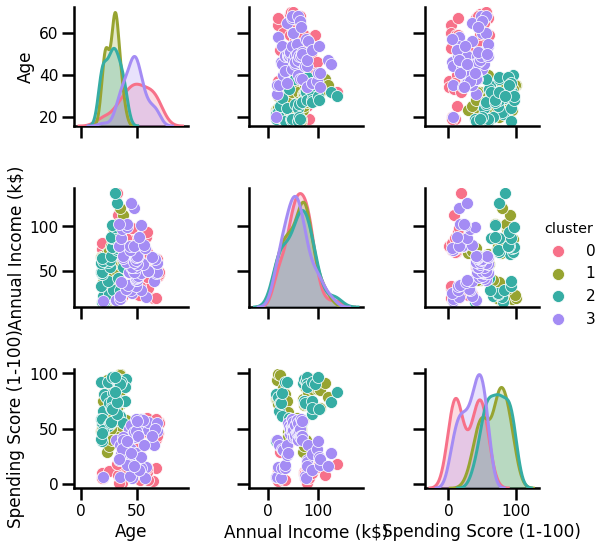

In [132]:
plt.figure(figsize=(5,5))
sns.pairplot(newdata, hue='cluster')

Well, it seems like the idea to find clusters in this data isn't working or maybe I don't have the ability to provide better insights but lets keep learning now,shall we?

Thank you for going through this Notebook, an upvote would be much appreciated and help my journey!